In [3]:
import logging
import os
import sys
import time
from datetime import datetime
from pathlib import Path
from typing import List, Optional

import glob
import ants
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:

from aind_ccf_reg.plots import plot_reg, plot_antsimgs

In [22]:

def perc_normalization(ants_img):
    """
    Percentile Normalization 
    
    Parameters
    -------------
    ants_img: ANTsImage
        
    Returns
    -----------
    ANTsImage
    """
    percentiles = [2, 98]
    percentile_values = np.percentile(ants_img.view(), percentiles)
    ants_img = (ants_img - percentile_values[0]) / (percentile_values[1] - percentile_values[0])

    return ants_img

In [47]:
channel_to_register = "Ex_639_Em_660"   
subject_dir = "SmartSPIM_685111_2023-09-28_18-19-10_stitched_2024-01-11_10-16-44"
dataset_id = subject_dir.split("_")[1]
results_folder = f"../results/{dataset_id}_to_ccf_{channel_to_register}"
reg_folder = os.path.abspath(f"{results_folder}/registration")

template_to_brain_transform_path = [
    f"{reg_folder}/rigid_0GenericAffine.mat",
     f"{reg_folder}/0GenericAffine.mat",
    f"{reg_folder}/1InverseWarp.nii.gz",
]

ccf_to_template_transform_path = [
    os.path.abspath("../data/spim_template_to_ccf/syn_0GenericAffine.mat"),
    os.path.abspath("../data/spim_template_to_ccf/syn_1InverseWarp.nii.gz"),
]


/root/capsule/data/allen_mouse_ccf/average_template/average_template_25.nii.gz
ccf: ANTsImage (ASL)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (528, 320, 456)
	 Spacing    : (0.025, 0.025, 0.025)
	 Origin     : (0.0, 0.0, 0.0)
	 Direction  : [-0.  0. -1.  1. -0.  0.  0. -1.  0.]

../data/allen_mouse_ccf/annotation/ccf_2017/annotation_25.nii.gz
ccf_anno: ANTsImage (ASL)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (528, 320, 456)
	 Spacing    : (0.025, 0.025, 0.025)
	 Origin     : (0.0, 0.0, 0.0)
	 Direction  : [-0.  0. -1.  1. -0.  0.  0. -1.  0.]

/root/capsule/data/smartspim_lca_template/smartspim_lca_template_25.nii.gz
template: ANTsImage (RAS)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (576, 648, 440)
	 Spacing    : (0.025, 0.025, 0.025)
	 Origin     : (-1.5114, -1.5, 1.5)
	 Direction  : [ 1.  0.  0.  0.  1.  0.  0.  0. -1.]




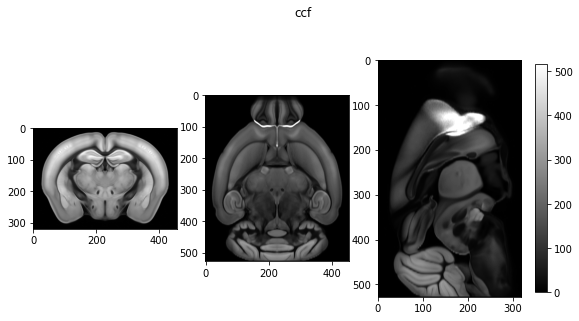

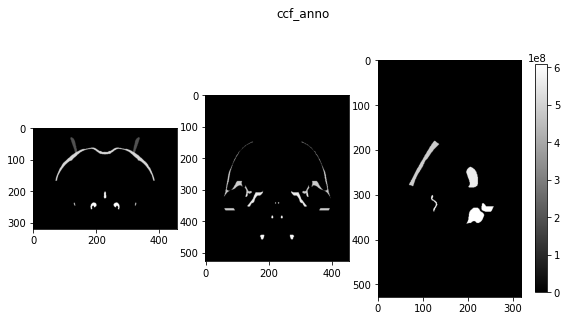

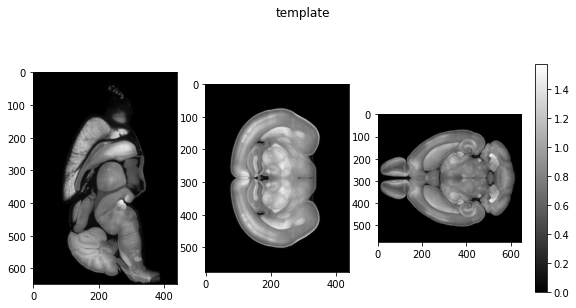

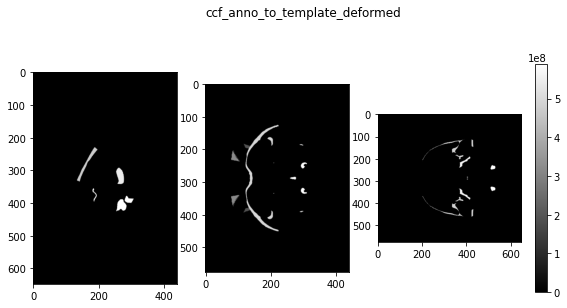

In [23]:
# deformed_path = "/root/capsule/scratch/template_to_ccf/25um/Output Image Volume.nrrd"
template_path = "/root/capsule/data/smartspim_lca_template/smartspim_lca_template_25.nii.gz"
ccf_path = "/root/capsule/data/allen_mouse_ccf/average_template/average_template_25.nii.gz"

ccf_annotation_path = "../data/allen_mouse_ccf/annotation/ccf_2017/annotation_25.nii.gz"
ccf = ants.image_read(ccf_path)
print(ccf_path)
print(f"ccf: {ccf}")
outprefix = "/root/capsule/scratch/ccf_to_brain/"
plot_antsimgs(ccf, 
              f"{outprefix}/ccf",
              title="ccf", 
              vmin=0, vmax=None)

###############################################

ccf_anno = ants.image_read(ccf_annotation_path)
print(ccf_annotation_path)
print(f"ccf_anno: {ccf_anno}")
outprefix = "/root/capsule/scratch/ccf_to_brain/"
plot_antsimgs(ccf_anno, 
              f"{outprefix}/ccf_anno",
              title="ccf_anno", 
              vmin=0, vmax=None)

###############################################
template = ants.image_read(template_path)
print(template_path)
print(f"template: {template}")

plot_antsimgs(template, 
              f"{outprefix}/template",
              title="template", 
              vmin=0, vmax=None)

###############################################
# apply transform
ccf_anno_to_template_deformed = ants.apply_transforms(
        fixed = template,
        moving = ccf_anno,
        transformlist=ccf_to_template_transform_path,
        whichtoinvert = [True, False]
    )

print("")
dataset_id = ""
plot_antsimgs(ccf_anno_to_template_deformed, 
              f"{outprefix}/ccf_anno_to_template_deformed",
              title=f"ccf_anno_to_template_deformed", 
              vmin=0, vmax=None)

In [44]:
# ants.image_write(ccf_anno_to_template_deformed,  
#                  f"{outprefix}/ccf_annotation_to_template_moved.nii.gz") 


## register to brain

/root/capsule/results/685111_to_ccf_Ex_639_Em_660/registration/prep_percNorm.nii.gz
brain: ANTsImage (RAS)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (535, 738, 314)
	 Spacing    : (0.025, 0.025, 0.025)
	 Origin     : (-1.5114, -1.5, 1.5)
	 Direction  : [ 1.  0.  0.  0.  1.  0.  0.  0. -1.]



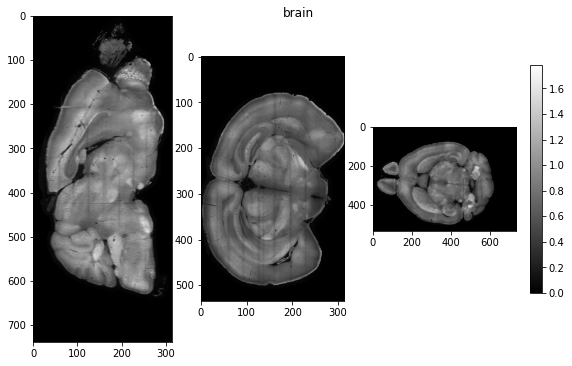

In [45]:
brain_path = f"{reg_folder}/prep_percNorm.nii.gz"
brain = ants.image_read(brain_path)

print(brain_path)
print(f"brain: {brain}")

outprefix = "/root/capsule/scratch/ccf_to_brain/"
plot_antsimgs(brain, 
              f"{outprefix}/brain",
              title="brain", 
              vmin=0, vmax=None)

In [46]:
template_to_brain_transform_path

['/root/capsule/results/685111_to_ccf_Ex_639_Em_660/registration/1InverseWarp.nii.gz',
 '/root/capsule/results/685111_to_ccf_Ex_639_Em_660/registration/0GenericAffine.mat',
 '/root/capsule/results/685111_to_ccf_Ex_639_Em_660/registration/rigid_0GenericAffine.mat']

In [48]:
template_to_brain_transform_path

['/root/capsule/results/685111_to_ccf_Ex_639_Em_660/registration/rigid_0GenericAffine.mat',
 '/root/capsule/results/685111_to_ccf_Ex_639_Em_660/registration/0GenericAffine.mat',
 '/root/capsule/results/685111_to_ccf_Ex_639_Em_660/registration/1InverseWarp.nii.gz']

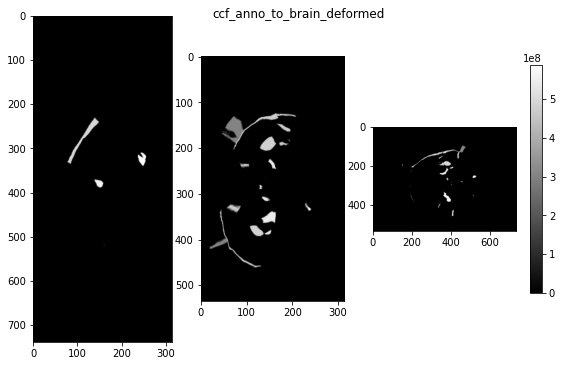

In [51]:
###############################################
# apply transform
ccf_anno_to_brain_deformed = ants.apply_transforms(
        fixed = brain,
        moving = ccf_anno_to_template_deformed,
        transformlist=template_to_brain_transform_path,
        whichtoinvert = [True, True, False]
    )

print("")
dataset_id = ""
plot_antsimgs(ccf_anno_to_brain_deformed, 
              f"{outprefix}/ccf_anno_to_brain_deformed",
              title=f"ccf_anno_to_brain_deformed", 
              vmin=0, vmax=None)

In [54]:
ants.image_write(ccf_anno_to_brain_deformed,  
                 f"{outprefix}/ccf_anno_to_brain_deformed.nii.gz") 


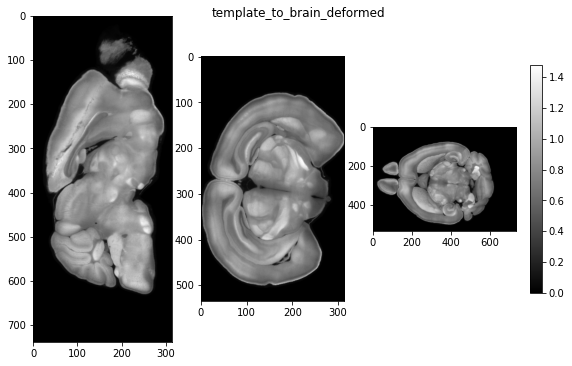

In [52]:
###############################################
# apply transform
template_to_brain_deformed = ants.apply_transforms(
        fixed = brain,
        moving = template,
        transformlist=template_to_brain_transform_path,
        whichtoinvert = [True, True, False]
    )

print("")
dataset_id = ""
plot_antsimgs(template_to_brain_deformed, 
              f"{outprefix}/template_to_brain_deformed",
              title=f"template_to_brain_deformed", 
              vmin=0, vmax=None)

In [53]:
ants.image_write(template_to_brain_deformed,  
                 f"{outprefix}/template_to_brain_deformed.nii.gz") 


In [42]:
def plot_overlay(ants_img1, ants_img2, title="", loc=0,):

    assert ants_img1.view().shape == ants_img2.view().shape, "Input images should have same dimension"
    
    print(ants_img1.view().shape)
    print(ants_img2.view().shape)
    
    half_size = np.array(ants_img1.shape) // 2
    
    fig, ax = plt.subplots(1, 3, figsize=(10, 6))
 
    img1 = ants_img1.view()[half_size[0], :, :]
    img2 = ants_img2.view()[half_size[0], :, :]
    overlay = np.stack( (img1, img2, img1), axis=2 )
    ax[0].imshow(overlay)

    img1 = ants_img1.view()[:, half_size[1], :]
    img2 = ants_img2.view()[:, half_size[1],  :]
    overlay = np.stack( (img1, img2, img1), axis=2 )
    ax[1].imshow(overlay)

    img1 = ants_img1.view()[:, :, half_size[2]]
    img2 = ants_img2.view()[:, :, half_size[2]]
    overlay = np.stack( (img1, img2, img1), axis=2 )
    ax[2].imshow(overlay)
        
    fig.show()  

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(576, 648, 440)
(576, 648, 440)


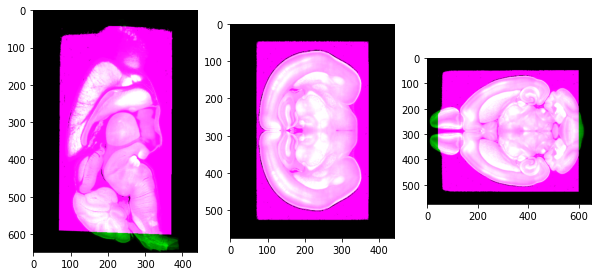

In [43]:
plot_overlay((ccf_to_template_deformed), 
             (template))

In [ ]:
for loc in [0, 1, 2]:
    plot_reg(perc_normalization(ccf_anno), 
             perc_normalization(ccf_norm,
             ccf_anno_to_template_deformed, 
             f"{figpath}_{loc}" , title, loc=loc, vmin=0, vmax=1.5)

In [ ]:

###############################################
# apply transform
ccf_to_template_deformed = ants.apply_transforms(
        fixed = template,
        moving = ccf,
        transformlist=ccf_to_template_transform_path,
        whichtoinvert = [True, False]
    )

print("")
dataset_id = ""
plot_antsimgs(ccf_to_template_deformed, 
              f"{outprefix}/ccf_to_template_deformed",
              title=f"ccf_to_template_deformed", 
              vmin=0, vmax=None)

In [49]:
ccf_to_template_transform_path

['/root/capsule/data/spim_template_to_ccf/syn_0GenericAffine.mat',
 '/root/capsule/data/spim_template_to_ccf/syn_1InverseWarp.nii.gz']

In [17]:
ccf_to_template_transform_path

['/root/capsule/data/spim_template_to_ccf/syn_0GenericAffine.mat',
 '/root/capsule/data/spim_template_to_ccf/syn_1InverseWarp.nii.gz']

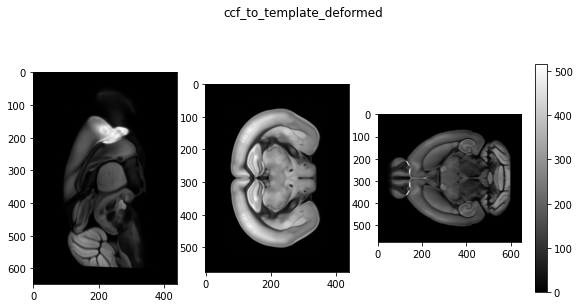

## load ccf_to_template_ref for comparison 

In [19]:
###############################################
ccf_to_template_ref = ants.image_read("../data/spim_template_to_ccf/ccf_in_template_multisyn.nii.gz")
print(f"ccf_to_template_ref: {ccf_to_template_ref}")

plot_antsimgs(ccf_to_template_ref, 
              f"{outprefix}/ccf_to_template_ref",
              title="ccf_to_template_ref", 
              vmin=0, vmax=None)


print(np.sum(np.abs(ccf_to_template_ref.view() - ccf_to_template_deformed.view()))
)
plot_antsimgs(ccf_to_template_ref - ccf_to_template_deformed, 
              f"{outprefix}/ccf_to_template_ref",
              title="ccf_to_template_ref", 
              vmin=0, vmax=None)

0.0

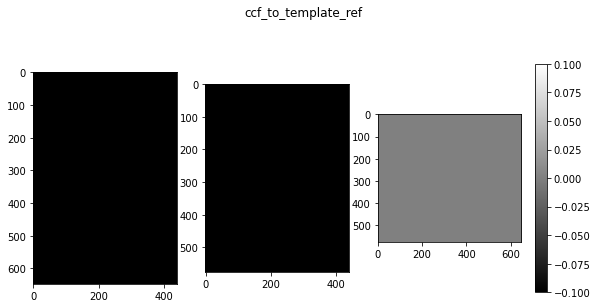